# Redistributions

## Setup

In [ ]:
%load_ext autoreload
%autoreload 2
import torch
import tensorcraft as tc
import matplotlib.pyplot as plt
import logging
log = logging.getLogger("tensorcraft")
log.setLevel("INFO")

[juan-20w000p2ge:162690] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.juan-20w000p2ge.1000/jf.0/3297181696/shared_mem_cuda_pool.juan-20w000p2ge could be created.
[juan-20w000p2ge:162690] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


03-03-2025 03:59:36 : INFO : compiler : __init__ -- Grammar file loaded successfully.
03-03-2025 03:59:36 : INFO : compiler : __init__ -- Parser object created successfully.


## AllGather

MultiAxisDist(mesh=torch.Size([3, 2, 2]), {((0, 1), (2,))}((2, 2)))


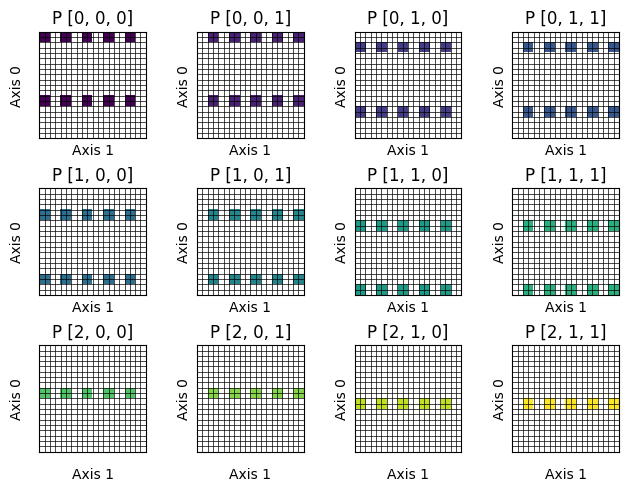

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([3,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), (2,)), 2)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)


### all axis

MultiAxisDist(mesh=torch.Size([3, 2, 2]), {((), ())}((0, 0)))
40.0


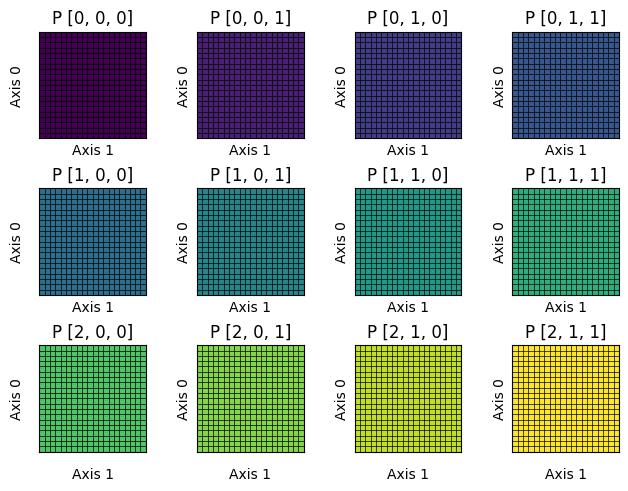

In [ ]:
new_dist, comm_vol, n_procs = dist.allGather(tensor_shape, gather_dim=None)
print(new_dist)
print(comm_vol)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

### Mesh Axis 0

Mesh axis idx: 0
MultiAxisDist(mesh=torch.Size([3, 2, 2]), {((1,), (2,))}([2, 2]))
40.0


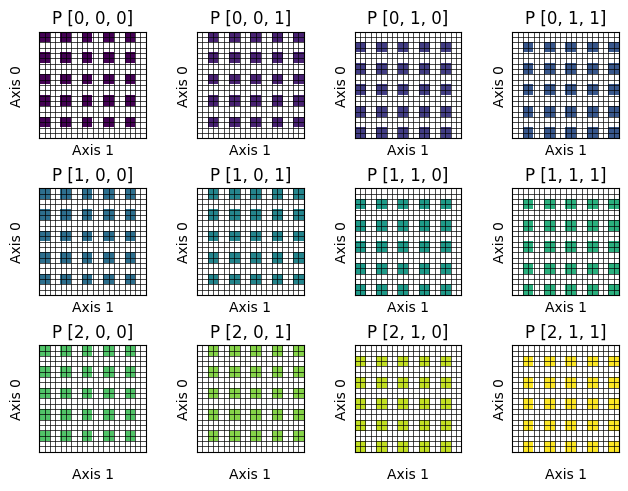

In [ ]:
new_dist, comm_vol, n_procs = dist.allGather(tensor_shape, gather_dim=0)
print(new_dist)
print(comm_vol)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

### Mesh Axis 1

Mesh axis idx: 1
MultiAxisDist(mesh=torch.Size([3, 2, 2]), {((0,), (2,))}([4, 2]))
40.0


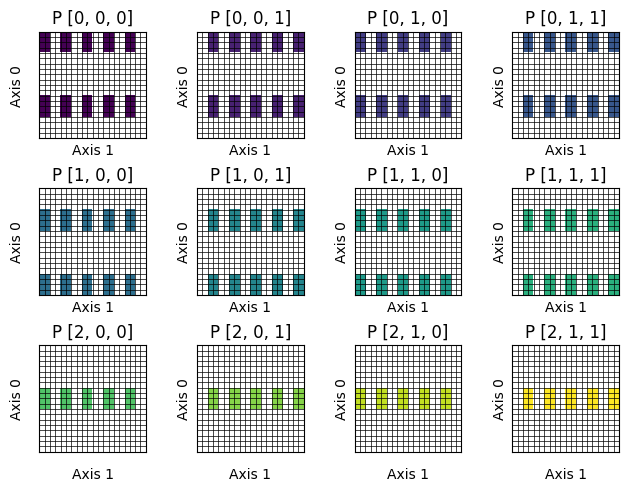

In [ ]:
new_dist, comm_vol, n_procs = dist.allGather(tensor_shape, gather_dim=1)
print(new_dist)
print(comm_vol)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

### Mesh Axis 2

Mesh axis idx: 0
MultiAxisDist(mesh=torch.Size([3, 2, 2]), {((0, 1), ())}([2, 2]))
40.0 2


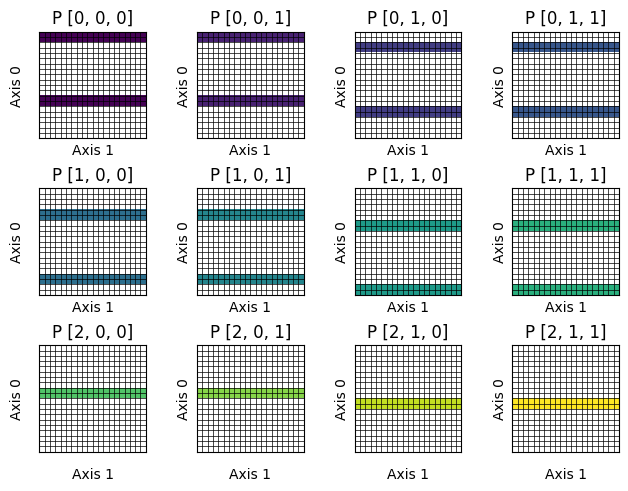

In [ ]:
new_dist, comm_vol, n_procs = dist.allGather(tensor_shape, gather_dim=2)
print(new_dist)
print(comm_vol, n_procs)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

## Split

MultiAxisDist(mesh=torch.Size([2, 2, 2]), {((), ())}((1, 1)))


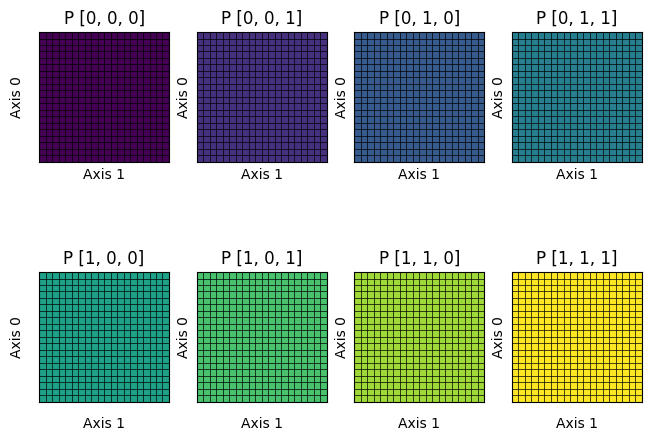

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((), ()), 1)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

0 0


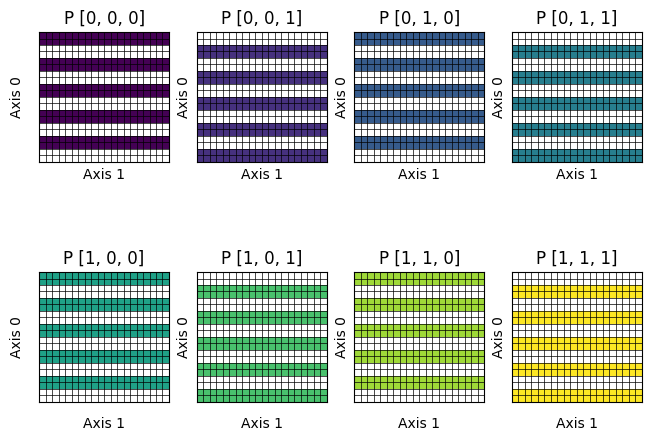

In [ ]:
new_dist, comm_vol, n_procs = dist.split(tensor_shape, tensor_axis=0, mesh_dims=2, block_size=2)
print(comm_vol, n_procs)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)


0 0


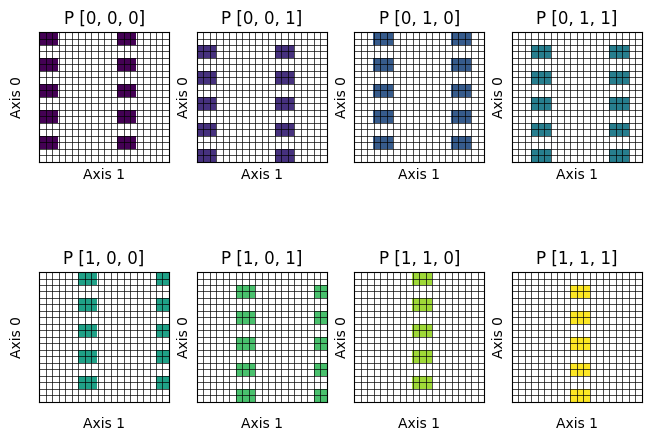

In [ ]:
new_new_dist, comm_vol, n_procs = new_dist.split(tensor_shape, tensor_axis=1, mesh_dims=(0,1), block_size=3)
print(comm_vol, n_procs)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_new_dist)

0 0
MultiAxisDist(mesh=torch.Size([2, 2, 2]), {((0, 1, 2), ())}((2, 1)))


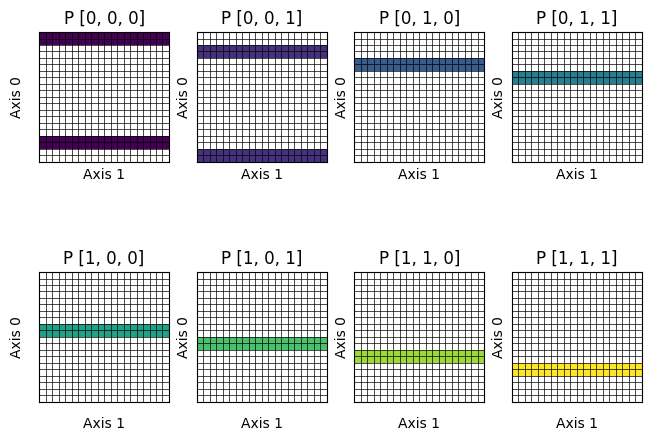

In [ ]:
new_new_dist, comm_vol, n_procs = new_dist.split(tensor_shape, tensor_axis=0, mesh_dims=(0,1), block_size=1)
print(comm_vol, n_procs)
print(new_new_dist)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_new_dist)

## All2All

MultiAxisDist(mesh=torch.Size([2, 2, 2]), {((0,), ())}((10, 10)))


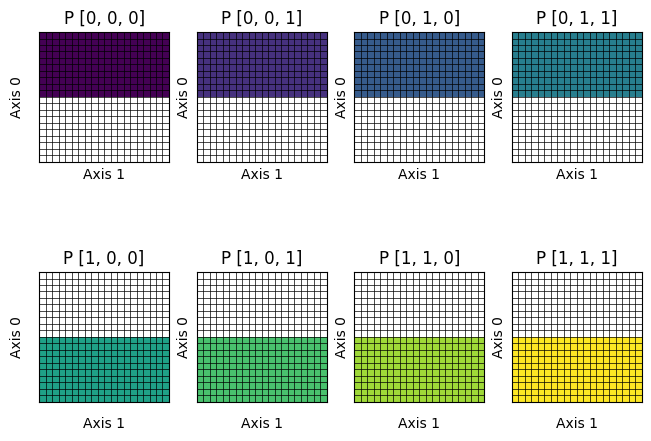

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,), ()), 10)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

MultiAxisDist(mesh=torch.Size([2, 2, 2]), {((), (0,))}((1, 10)))
200.0 2


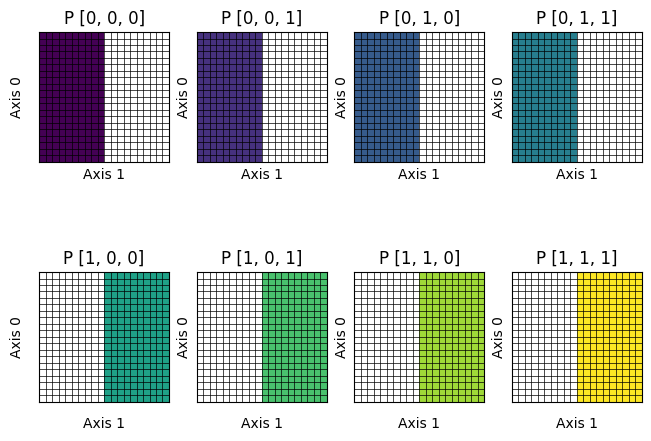

In [ ]:
new_dist, comm_vol, n_procs = dist.all2all(tensor_shape, 0, 1)
print(new_dist)
print(comm_vol, n_procs)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

MultiAxisDist(mesh=torch.Size([3, 2, 2]), {((0, 1), (2,))}((1, 4)))


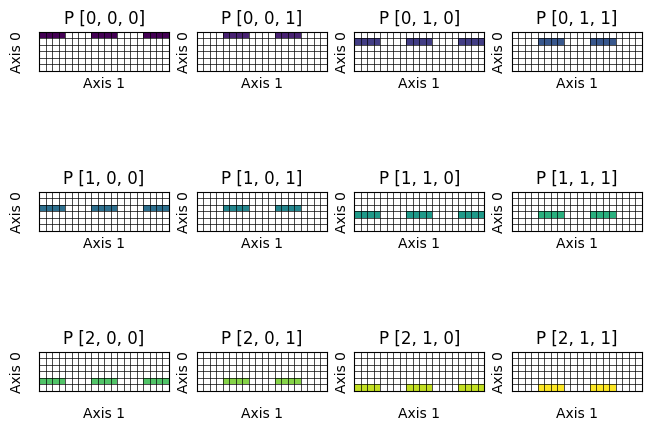

In [ ]:
tensor_shape = torch.Size([6, 20])
mesh = torch.Size([3,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), (2,)), (1,4))
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

In [ ]:
new_dist, comm_vol, n_procs = dist.all2all(tensor_shape, 0,1,minor=False)
print(new_dist)
print(comm_vol, n_procs)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

ValueError: Incompatible resulting block size. The block size of the newly split tensor axis must be divisible by the involved mesh dimentions

## Permute

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([3,3])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), ()), 2)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

In [ ]:
new_dist, comm_vol, n_procs = dist.permute(tensor_shape, [0,1])
print(new_dist)
print(comm_vol, n_procs)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,), ()), 1)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

## Memory efficient redistributions example

In [ ]:
tensor_shape = torch.Size([8, 8, 8, 4])
mesh = torch.Size([4,2,4])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), (), (), ()), 1)
print(dist)

print("Option 1")
new_dist, comm_vol, n_procs = dist.all2all(tensor_shape, 0, 1, minor=True)
print(f"Step 0: all2all(0,1) - {new_dist}, comm_vol, n_procs: {comm_vol, n_procs}")
new_dist, comm_vol, n_procs = new_dist.all2all(tensor_shape, 0, 2)
print(f"Step 1: all2all(0,2) - {new_dist}, comm_vol, n_procs: {comm_vol, n_procs}")

print("Option 2")
new_dist, comm_vol, n_procs = dist.split(tensor_shape, 3, 2, 1)
print(f"Step 0: split(3,2)  {new_dist}, comm_vol, n_procs: {comm_vol, n_procs}")
new_dist, comm_vol, n_procs = new_dist.all2all(tensor_shape, 0, 1, minor=True)
print(f"Step 1: all2all(0,1) - {new_dist}, comm_vol, n_procs: {comm_vol, n_procs}")
new_dist, comm_vol, n_procs = new_dist.all2all(tensor_shape, 0, 2)
print(f"Step 2: all2all(0,2) - {new_dist}, comm_vol, n_procs: {comm_vol, n_procs}")
new_dist, comm_vol, n_procs = new_dist.allGather(tensor_shape, 2)
print(f"Step 3: allgather(2)  {new_dist}, comm_vol, n_procs: {comm_vol, n_procs}")